<a href="https://colab.research.google.com/github/krakowiakpawel9/uczenie_maszynowe/blob/master/decision_trees/regression/01_decision_tree_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

X = np.arange(0, 300)
noise = np.random.randn(300) * 10000

y = X**2 + noise

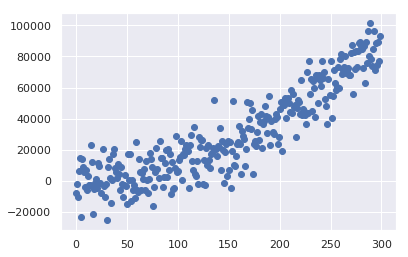

In [2]:
plt.scatter(X, y)

In [3]:
from sklearn.linear_model import LinearRegression

X = X.reshape(-1, 1)

lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

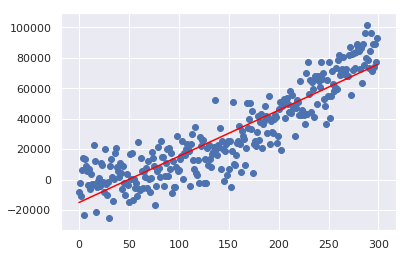

In [4]:
plt.plot(range(len(X)), lin_reg.predict(X), c='red')
plt.scatter(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


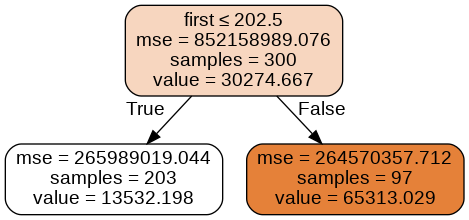

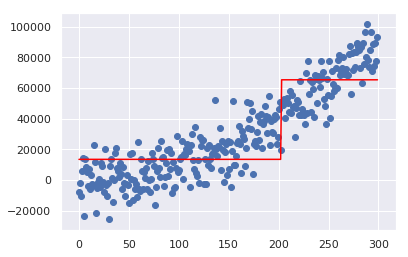

In [5]:
def make_dt_regression(max_depth=1):
    from sklearn.tree import DecisionTreeRegressor

    reg = DecisionTreeRegressor(max_depth=max_depth)
    reg.fit(X, y)

    plt.plot(range(len(X)), reg.predict(X), c='red')
    plt.scatter(X, y)
    from sklearn.tree import export_graphviz
    from sklearn.externals.six import StringIO
    from IPython.display import Image
    import pydotplus

    dot_data = StringIO()
    export_graphviz(reg, out_file=dot_data,
                   filled=True, rounded=True,
                   special_characters=True,
                   feature_names=['first'],
                   class_names=[1, 0])
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    graph.write_png('graph.png')
    return Image(graph.create_png())
    
make_dt_regression(max_depth=1)    

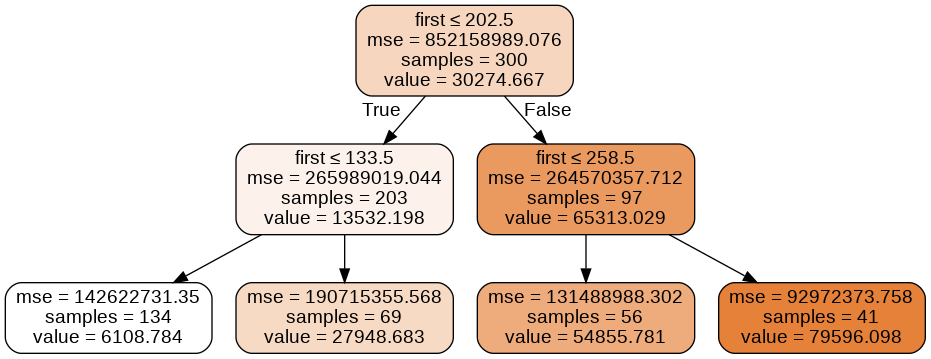

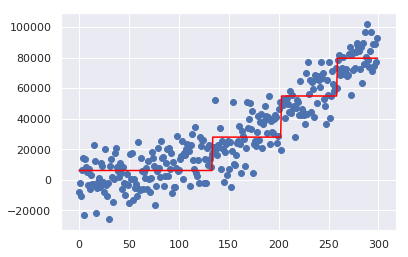

In [6]:
make_dt_regression(max_depth=2)

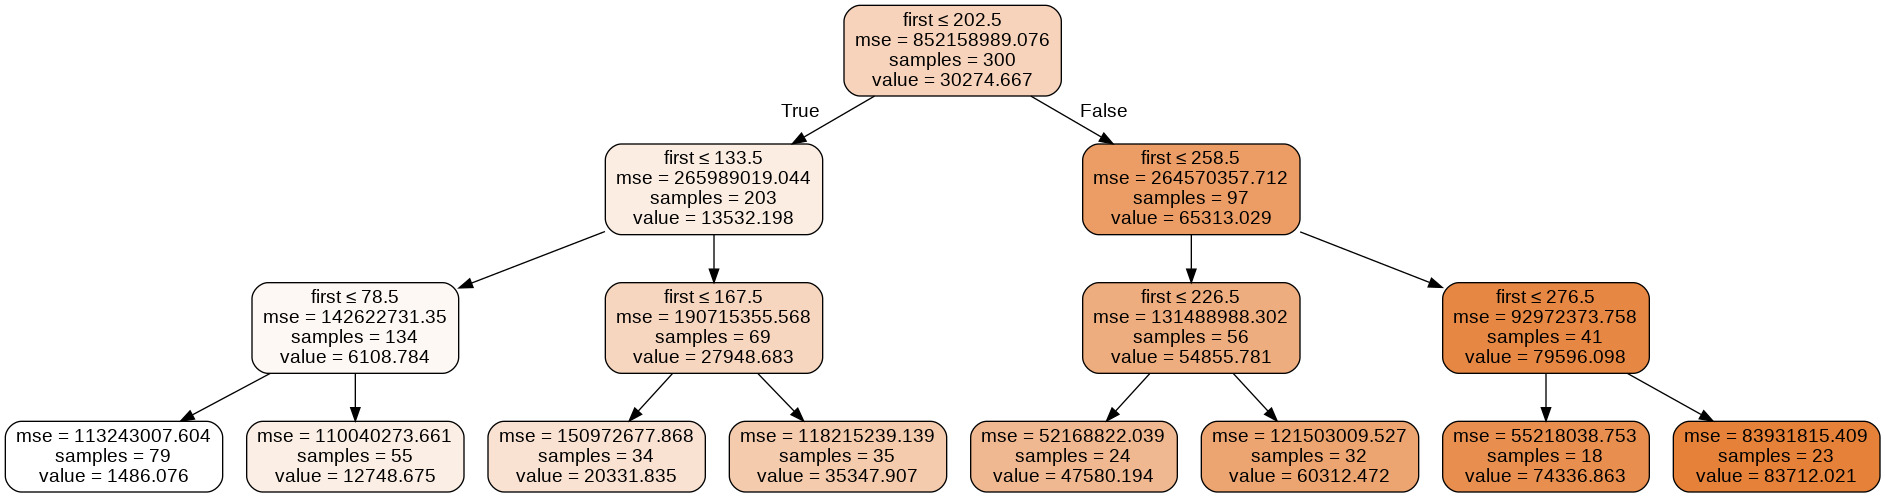

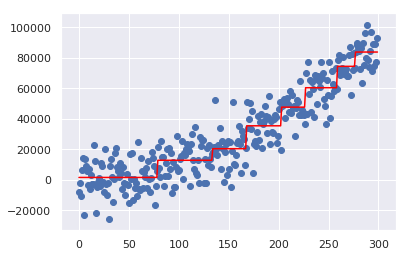

In [7]:
make_dt_regression(max_depth=3)

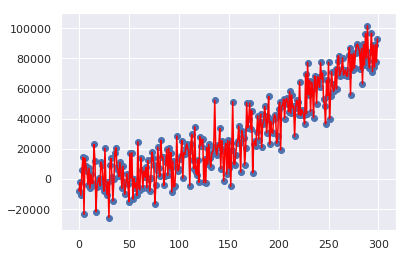

In [8]:
make_dt_regression(max_depth=None)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


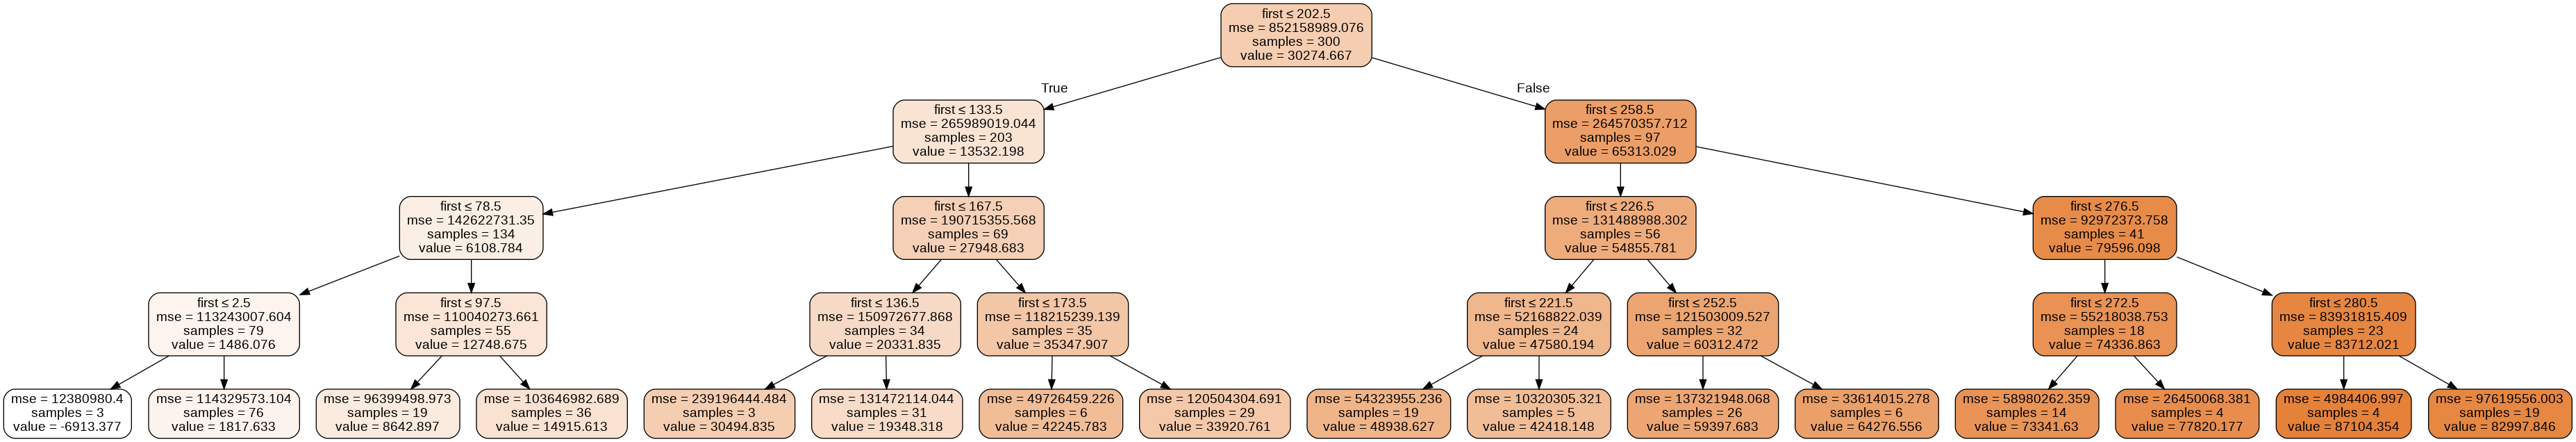

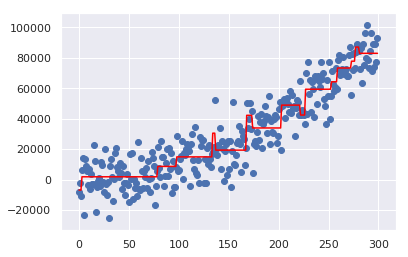

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

param_grid = [{'max_depth': [1, 2, 3, 4, 5],
              'min_samples_leaf': [3, 4, 5, 10, 15]}]

reg = DecisionTreeRegressor()

gs = GridSearchCV(reg, param_grid=param_grid, scoring='r2', n_jobs=-1)
gs.fit(X, y)

model = gs.best_estimator_

plt.plot(range(len(X)), model.predict(X), c='red')
plt.scatter(X, y)  

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(model, out_file=dot_data,
               filled=True, rounded=True,
               special_characters=True,
               feature_names=['first'],
               class_names=[1, 0])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('graph.png')
Image(graph.create_png())